In [ ]:
!pip3 install NewsSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.0/919.0 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
import NewsSentiment

In [ ]:
from NewsSentiment import TargetSentimentClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
tsc = TargetSentimentClassifier()
vader_analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

100%|██████████| 584M/584M [00:09<00:00, 62.8MB/s]


# Load Data

In [ ]:
import numpy as np
import pandas as pd
import spacy
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
df= pd.read_csv('Gaza_v2_preprocessed.csv', encoding='latin-1')
df.head()

article_title             author  \
0  Death toll of Palestinians in Gaza rises to 27...          By Xinhua   
1  China, Norway should be forces for stability, ...    By Global Times   
2  Wang, Eide hold talks as Europe's China policy...        By Fan Anqi   
3  Why does the US keep creating wars while sayin...    By Global Times   
4     With war next door, EU noses into Indo-Pacific  By Mark Blacklock   

                     published_time  \
0  Published: Feb 06, 2024 10:19 AM   
1  Published: Feb 06, 2024 12:35 PM   
2  Published: Feb 06, 2024 10:57 PM   
3  Published: Feb 04, 2024 12:41 AM   
4  Published: Feb 04, 2024 06:59 PM   

                                        article_text  
0  People gather around a destroyed house after a...  
1  China Foreign Minister Wang Yi (right) meets w...  
2  China Foreign Minister Wang Yi (right) meets w...  
3  Illustration: Liu Rui/GTOn Friday local time, ...  
4  Photo: VCGWestern attitudes toward Asia can so...

In [ ]:
df.shape

(357, 4)

In [ ]:
#check and remove incomplete data
check_condition = (df['article_text'] == 'Article text not found') & (df['author'] == 'Author not found')
df = df[~check_condition]

In [ ]:
df.shape

(357, 4)

In [ ]:
df['published_time'] = df['published_time'].str.replace('Published: ', '')
df['published_time'] = pd.to_datetime(df['published_time'], format='%b %d, %Y %I:%M %p')
df['published_time'].head()

0   2024-02-06 10:19:00
1   2024-02-06 12:35:00
2   2024-02-06 22:57:00
3   2024-02-04 00:41:00
4   2024-02-04 18:59:00
Name: published_time, dtype: datetime64[ns]

# Pre-processing

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#split each article into sentences
def split_into_sentences(article):
    doc = nlp(article)
    return [sent.text for sent in doc.sents]

In [ ]:
target_entities = [
    "Palestinian-Israeli Conflict", "Israel", "Gaza", "Palestine", "US",
    "China", "West", "Saudi Arabia", "West Bank", "Middle East",
    "Houthi", "Hamas", "Rafah", "UN", "Wang Yi",
    "Joe Biden", "Antony Blinken", "Zhang Jun", "Xi Jinping", "Benjamin Netanyahu",
    "Antonio Guterres", "EU", "EU Union"
]

# Sentiment Analysis

In [ ]:
#vader
def vader_sentiment(text):
    scores = vader_analyzer.polarity_scores(text)
    #define the thresholds to categorize it
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
#initialize lists for comparison results
vader_results = []
tsc_results = []

In [ ]:
#threshold max sentence length
MAX_SENTENCE_LENGTH = 100

for idx, row in df.iterrows():
    article_text = row['article_text']
    sentences = split_into_sentences(article_text)

    for sentence in sentences:
        original_sentence = sentence
        sentence = sentence.lower()

        #skip sentences that exceed the maximum length threshold
        if len(sentence.split()) > MAX_SENTENCE_LENGTH:
            print(f"Skipping long sentence.")
            continue

        #TSC Sentiment Analysis
        for target in target_entities:
            if target.lower() in sentence:
                entity_start = sentence.find(target.lower())
                entity_end = entity_start + len(target)
                left_context = sentence[:entity_start]
                right_context = sentence[entity_end:]

                try:
                    sentiment_tsc = tsc.infer_from_text(left_context, target, right_context)
                except TooLongTextException:
                    print(f"TooLongTextException: {target} - Sentence too long for TSC")
                    continue #move on to the next target
                except TargetNotFoundException:
                    print(f"TargetNotFoundException: {target} not found in {sentence}")
                    continue #move on to the next target

                sentiment_label_tsc = sentiment_tsc[0]['class_label'].lower()

                #store TSC result (with target)
                tsc_results.append({
                    'Model': 'TSC',
                    'Sentence': original_sentence,
                    'Target': target,
                    'Sentiment': sentiment_label_tsc,
                    'published_time': row['published_time']
                })

        #VADER (general sentiment analysis for the entire sentence)
        sentiment_vader = vader_sentiment(sentence)

        #store VADER result
        vader_results.append({
            'Model': 'VADER',
            'Sentence': original_sentence,
            'Sentiment': sentiment_vader,
            'published_time': row['published_time']
        })

Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.76s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.03s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.01s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.02s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.10s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.93s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.15s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.09s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.03s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.09s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.96s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.48s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.47s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.48s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.48s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.01s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.63s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.26s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.91s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.51s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.14s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.99s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.08s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.98s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.84s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.67s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.14s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.01s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.13s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.91s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.12s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.03s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.83s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.91s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.51s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.13s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.84s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.77s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.15s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.11s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.72s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.96s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.17s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.88s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.65s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.08s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.97s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.02s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.85s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.65s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.23s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.21s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.73s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.73s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.92s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.79s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.22s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.15s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.08s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.94s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.11s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.51s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.51s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.70s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.07s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.17s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.09s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.07s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.01s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.81s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.51s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.97s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.86s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.10s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.98s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.73s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.70s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.16s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.00s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.10s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.07s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.71s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.78s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.72s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.99s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.48s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.15s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.94s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.72s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.72s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.10s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.08s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.97s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.78s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.80s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.83s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.96s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.91s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.07s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.66s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.01s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.02s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.10s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.75s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.77s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.51s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.73s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.78s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.95s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.77s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.08s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.99s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.86s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.02s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.01s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.99s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.73s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.14s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.01s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.68s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.89s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.72s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.65s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.11s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.76s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.11s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.63s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.13s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.04s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.63s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.03s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  2.00s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.66s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.63s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.13s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.65s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.20s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.
Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.02s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.15s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.08s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.17s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.84s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.09s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.07s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.15s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.07s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.10s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.89s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.76s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.80s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.96s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.92s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.71s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.01s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.99s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.10s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.02s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.13s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.99s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.69s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.09s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.51s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.10s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.03s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.78s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.73s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.68s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.57s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.09s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.64s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.01s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.67s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.62s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.70s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.99s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.59s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.92s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.61s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.04s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.60s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.86s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.56s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.69s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.58s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.05s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.54s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.02s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.81s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.48s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.55s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.47s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.48s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.77s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.44s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.48s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.91s/batch]


Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.46s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.08s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.45s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.45s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.43s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.47s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.46s/batch]


Skipping long sentence.
Skipping long sentence.
Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.47s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.49s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.46s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.51s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.53s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.70s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.95s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.94s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


In [ ]:
#convert both results to DataFrames
tsc_results_df = pd.DataFrame(tsc_results)
vader_results_df = pd.DataFrame(vader_results)

In [ ]:
#save results
tsc_results_df.to_excel('tsc_sentiment_results.xlsx', index=False)
vader_results_df.to_excel('vader_sentiment_results.xlsx', index=False)

# Visualization

## Overall Sentiment Distribution

In [ ]:
#aggregate sentiment counts for TSC
tsc_sentiment_counts = tsc_results_df['Sentiment'].value_counts()

#aggregate sentiment counts for VADER
vader_sentiment_counts = vader_results_df['Sentiment'].value_counts()

In [ ]:
sentiment_comparison = pd.DataFrame({
    'Negative': [tsc_sentiment_counts.get('negative', 0), vader_sentiment_counts.get('negative', 0)],
    'Neutral': [tsc_sentiment_counts.get('neutral', 0), vader_sentiment_counts.get('neutral', 0)],
    'Positive': [tsc_sentiment_counts.get('positive', 0), vader_sentiment_counts.get('positive', 0)]
}, index=['TSC', 'VADER'])

sentiment_comparison

Negative  Neutral  Positive
TSC        3031    13427      2472
VADER      4246     3144      2988

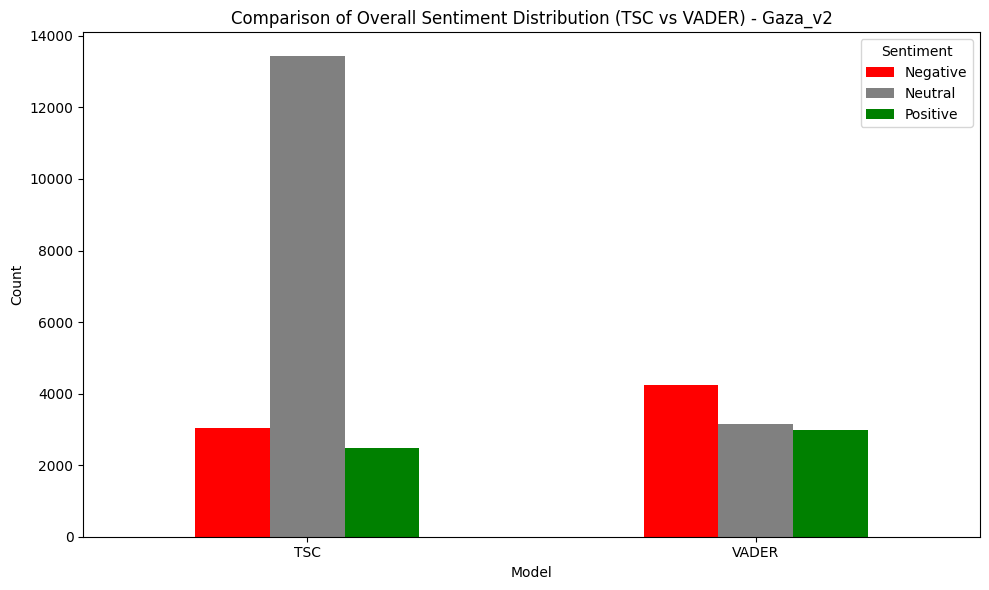

In [ ]:
sentiment_comparison.plot(kind='bar', color=['red', 'gray', 'green'], figsize=(10, 6))
plt.title('Comparison of Overall Sentiment Distribution (TSC vs VADER) - Gaza_v2')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.tight_layout()
plt.show()

## Sentiment Over Time Comparison

In [ ]:
#process TSC results by month
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')  # Convert date to monthly periods
tsc_sentiment_counts = tsc_results_df.pivot_table(
    index=['month'],  #group by month
    columns='Sentiment',
    aggfunc='size',
    fill_value=0
)

In [ ]:
#normalize TSC sentiment proportions
tsc_sentiment_proportions = tsc_sentiment_counts.div(tsc_sentiment_counts.sum(axis=1), axis=0)

In [ ]:
#tsc_sentiment_proportions

In [ ]:
#process VADER results by month
vader_results_df['month'] = vader_results_df['published_time'].dt.to_period('M')  # Convert date to monthly periods
vader_sentiment_counts = vader_results_df.pivot_table(
    index=['month'],  #group by month
    columns='Sentiment',
    aggfunc='size',
    fill_value=0
)

In [ ]:
#vader_sentiment_counts

In [ ]:
#normalize VADER sentiment proportions
vader_sentiment_proportions = vader_sentiment_counts.div(vader_sentiment_counts.sum(axis=1), axis=0)

<Figure size 1200x600 with 0 Axes>

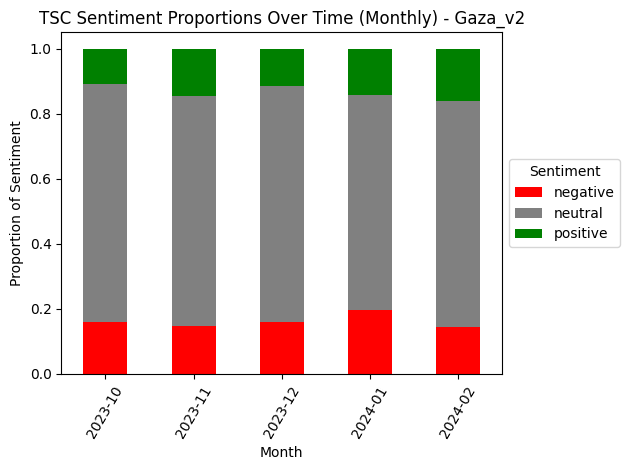

In [ ]:
#Plot 1: TSC Sentiment Proportions Over Time (Monthly)
plt.figure(figsize=(12, 6))
tsc_sentiment_proportions.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('TSC Sentiment Proportions Over Time (Monthly) - Gaza_v2')
plt.xlabel('Month')
plt.ylabel('Proportion of Sentiment')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

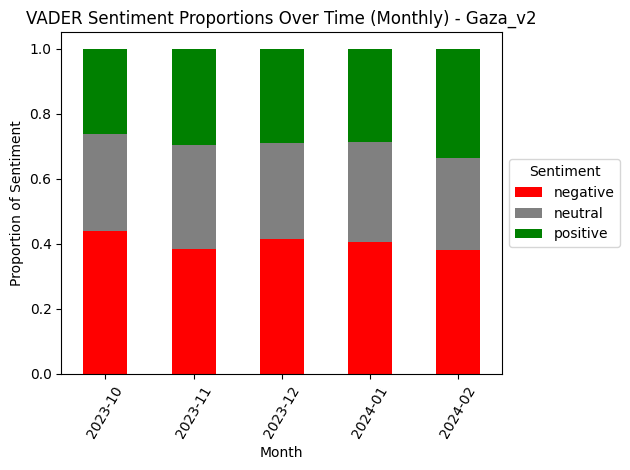

In [ ]:
#Plot 2: VADER Sentiment Proportions Over Time (Monthly)
plt.figure(figsize=(12, 6))
vader_sentiment_proportions.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('VADER Sentiment Proportions Over Time (Monthly) - Gaza_v2')
plt.xlabel('Month')
plt.ylabel('Proportion of Sentiment')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Word Clouds

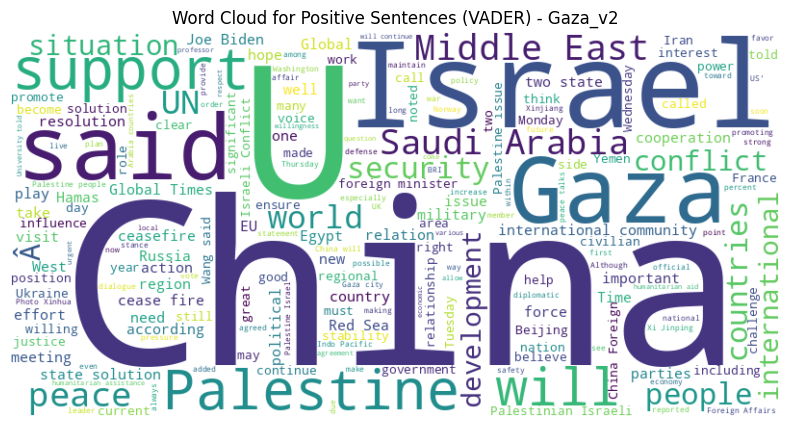

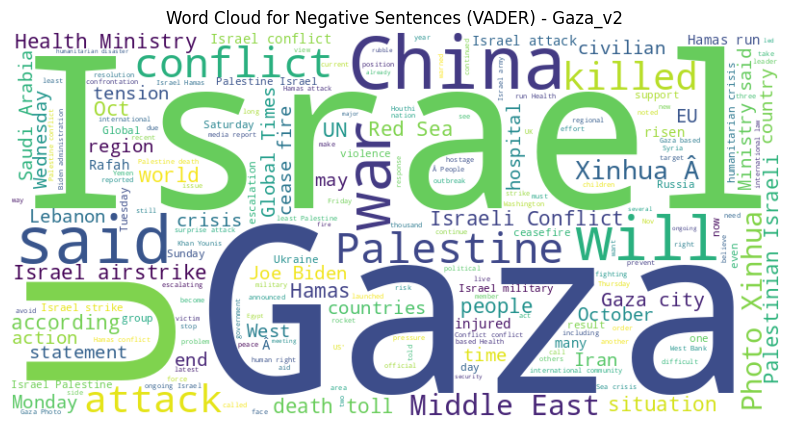

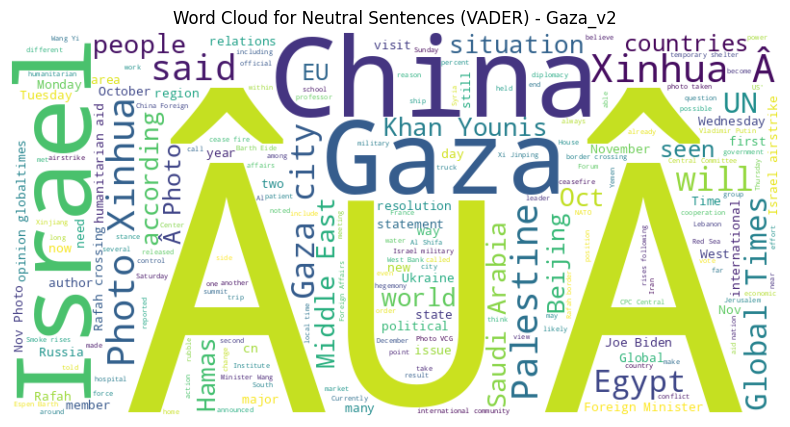

In [ ]:
#generate word cloud for VADER sentiment (positive, negative, neutral)
def wc_vader(sentiment_label, df):
    sentences = " ".join(df[df['Sentiment'] == sentiment_label]['Sentence'])

    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (VADER) - Gaza_v2')
        plt.show()

wc_vader('positive', vader_results_df)
wc_vader('negative', vader_results_df)
wc_vader('neutral', vader_results_df)


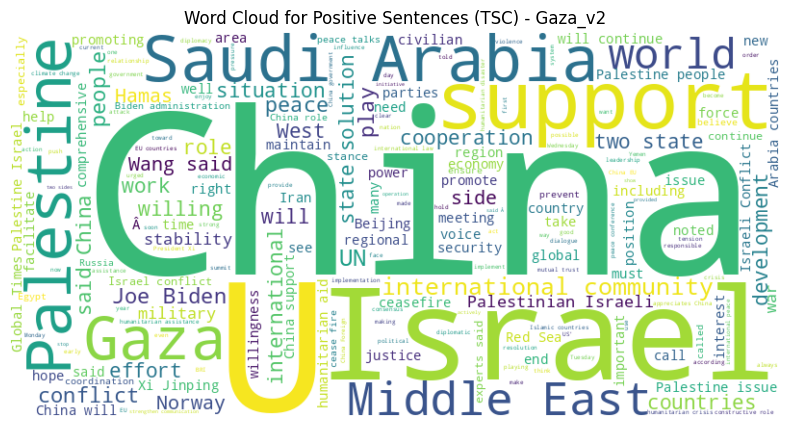

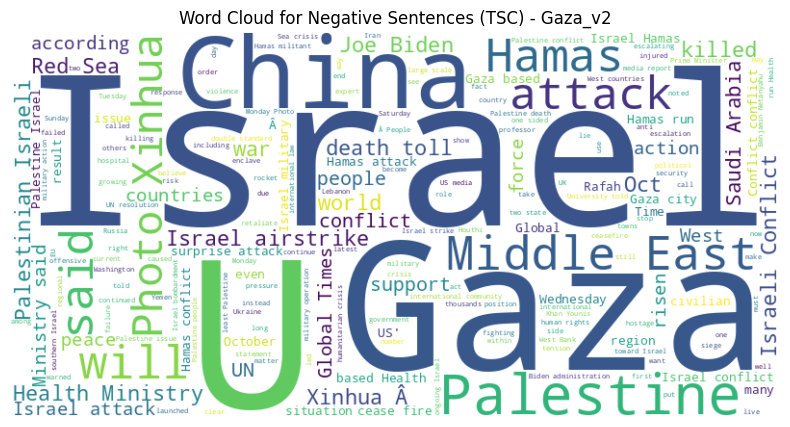

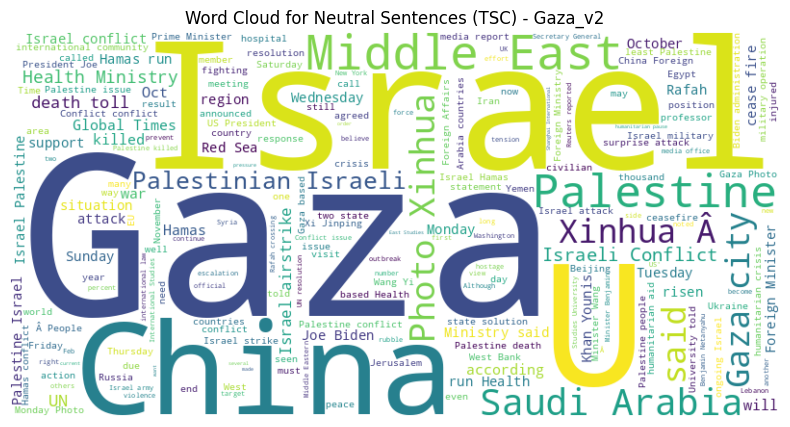

In [ ]:
#generate word cloud for TSC sentiment (positive, negative, neutral)
def wc_tsc(sentiment_label, df):
    sentences = " ".join(df[df['Sentiment'] == sentiment_label]['Sentence'])

    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (TSC) - Gaza_v2')
        plt.show()

wc_tsc('positive', tsc_results_df)
wc_tsc('negative', tsc_results_df)
wc_tsc('neutral', tsc_results_df)

## Targeted Sentiment Analysis Visualization using TSC

In [ ]:
#overall sentiment distribution per target

#group by target and sentiment, count the occurrences
overall_sentiment_per_target = tsc_results_df.groupby(['Target', 'Sentiment']).size().unstack(fill_value=0)
print(overall_sentiment_per_target )

#calculate sentiment proportions per target
overall_sentiment_per_target_proportion = overall_sentiment_per_target.div(overall_sentiment_per_target.sum(axis=1), axis=0)
overall_sentiment_per_target_proportion['Overall Sentiment'] = overall_sentiment_per_target_proportion[['positive', 'negative', 'neutral']].idxmax(axis=1)
print(overall_sentiment_per_target_proportion)

overall_sentiment_per_target_proportion.to_excel('overall_sentiment_per_target.xlsx')

Sentiment                     negative  neutral  positive
Target                                                   
Antonio Guterres                     0       20         5
Antony Blinken                       3       22         7
Benjamin Netanyahu                   7       26         9
China                              166      989       645
EU                                  29      388        54
EU Union                             1       14         0
Gaza                                30     1877         8
Hamas                              487      202        18
Houthi                             102       65         9
Israel                             832     1725       241
Joe Biden                           88       60        70
Middle East                         19      498        10
Palestine                           61     1210       117
Palestinian-Israeli Conflict        53      180         1
Rafah                                0      225         0
Saudi Arabia  

<Figure size 2000x1000 with 0 Axes>

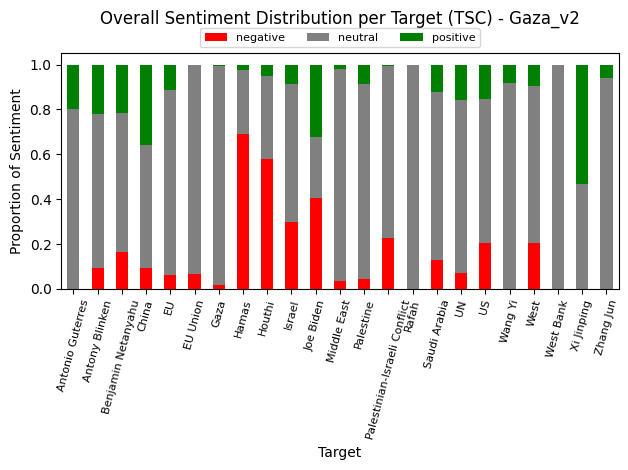

In [ ]:
#plot the stacked bar chart for overall sentiment distribution per target
plt.figure(figsize=(20, 10))
overall_sentiment_per_target_proportion.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('Overall Sentiment Distribution per Target (TSC) - Gaza_v2\n')
plt.xlabel('Target')
plt.ylabel('Proportion of Sentiment')
plt.xticks(rotation=75, fontsize=8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

## Visualization Sentiment Overtime for Target

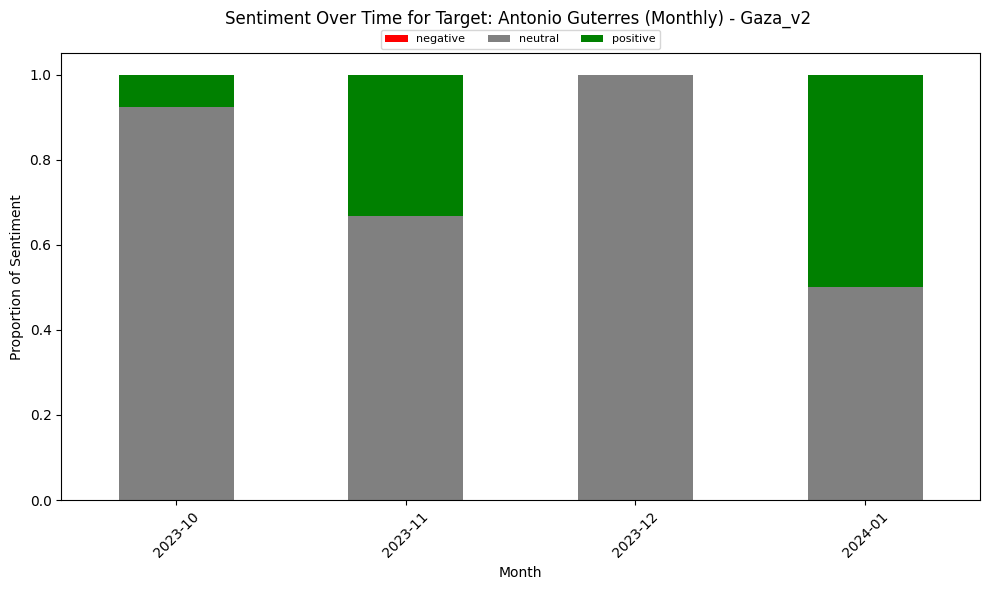

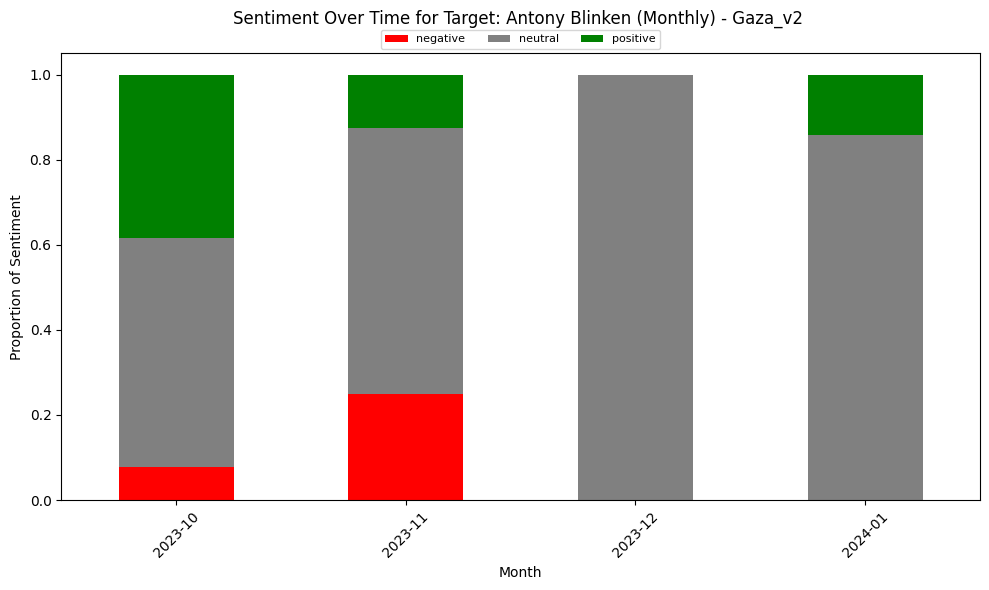

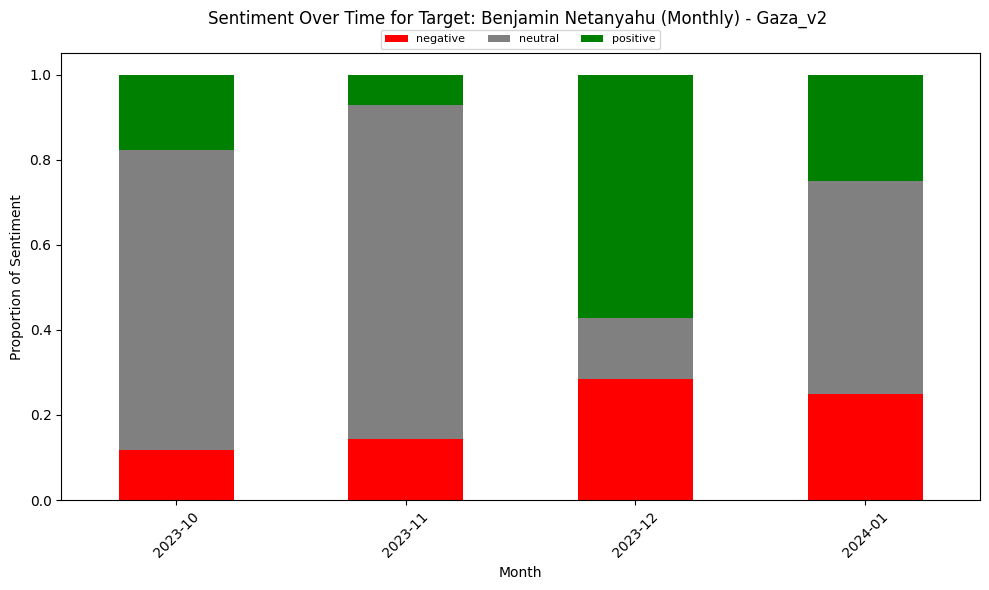

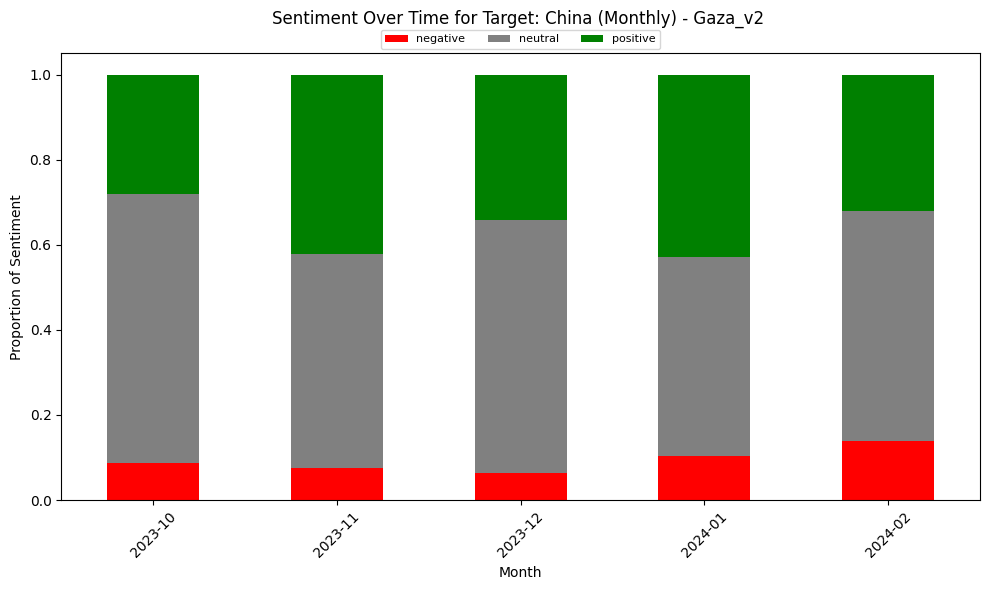

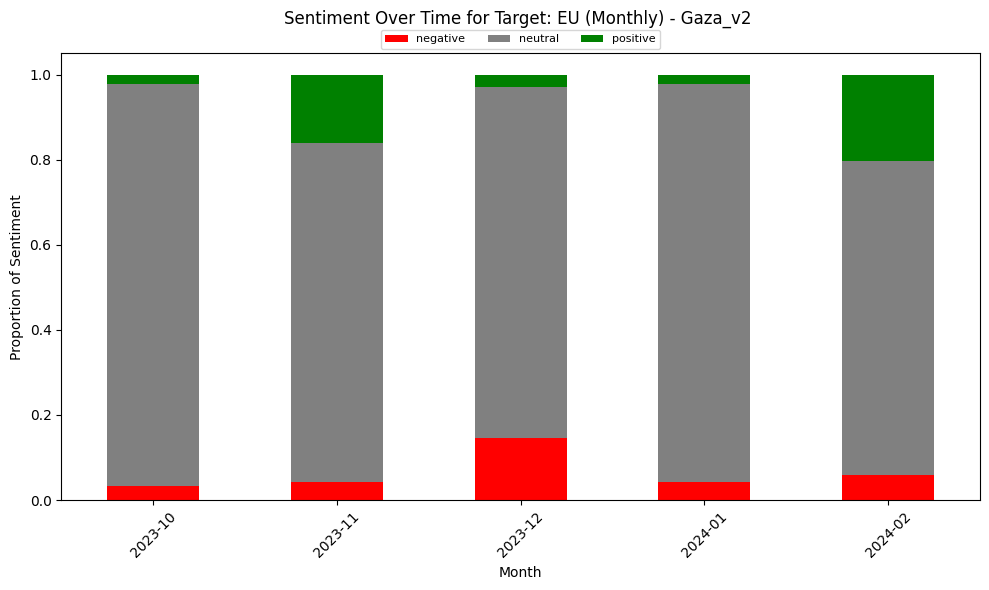

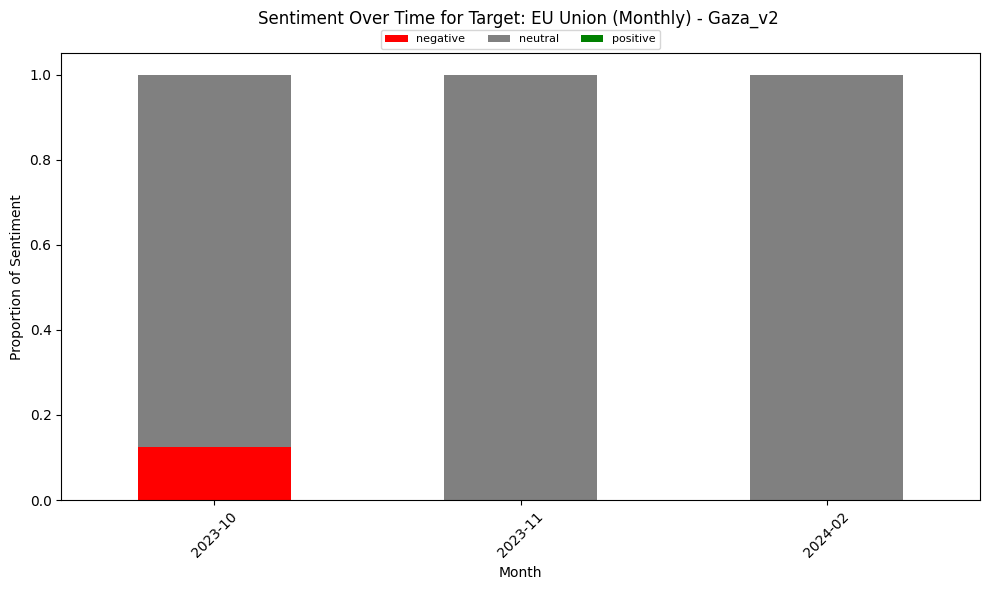

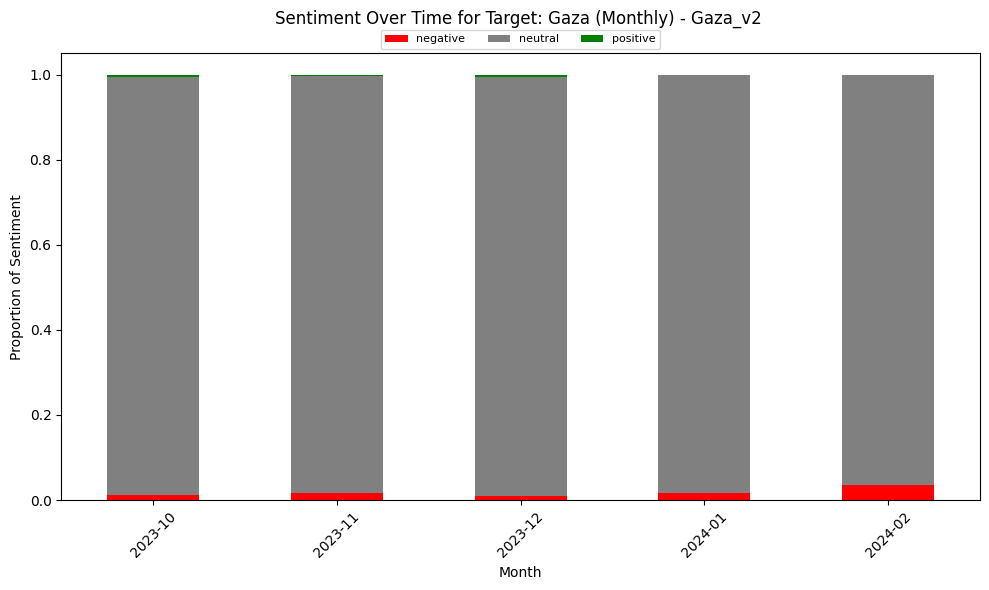

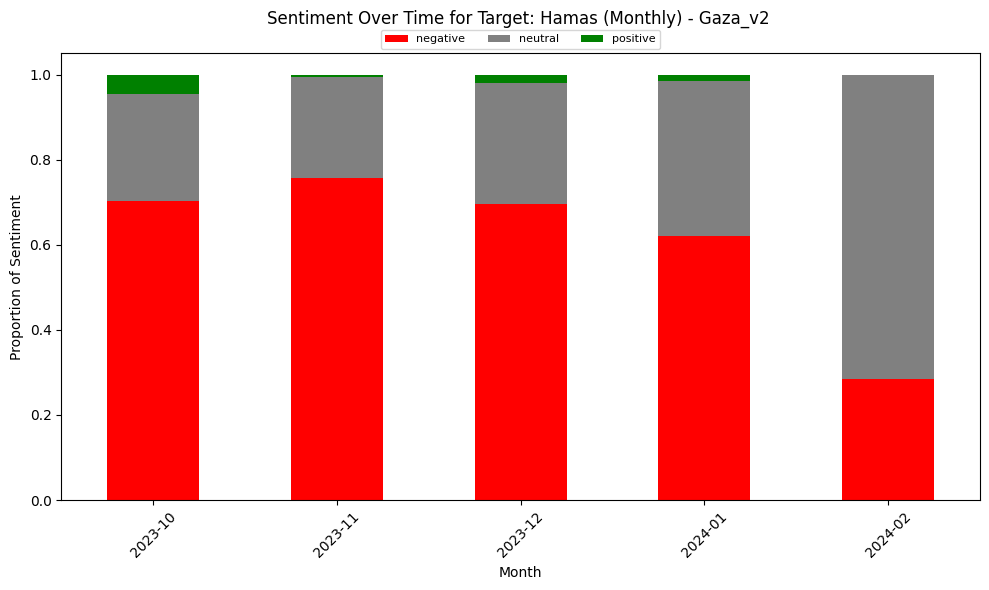

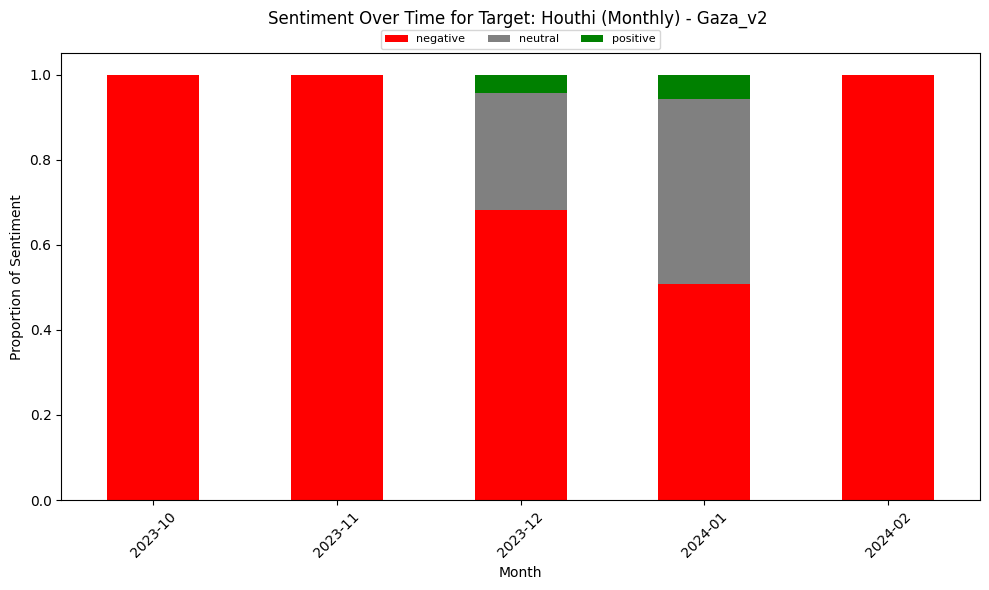

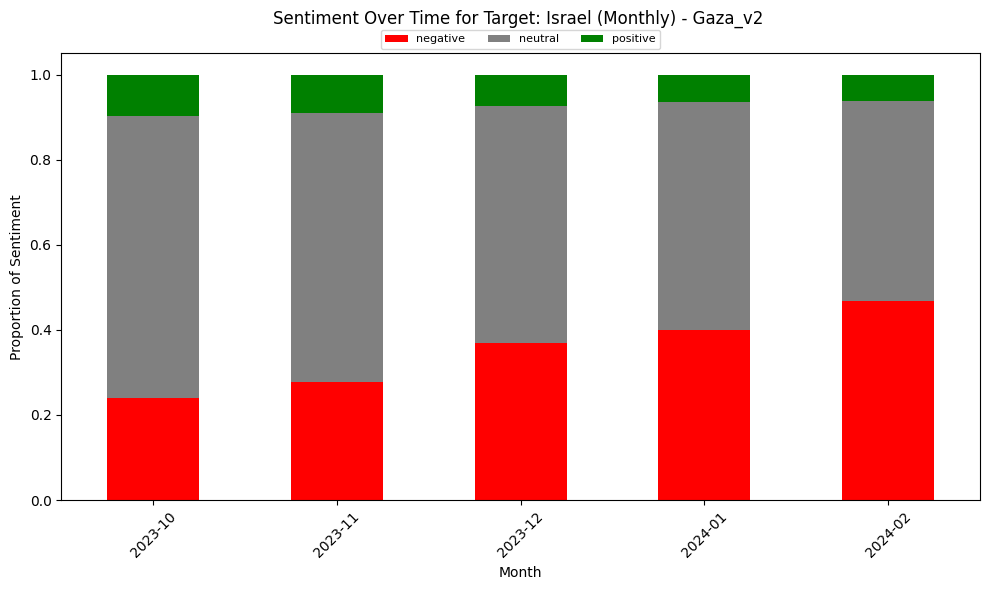

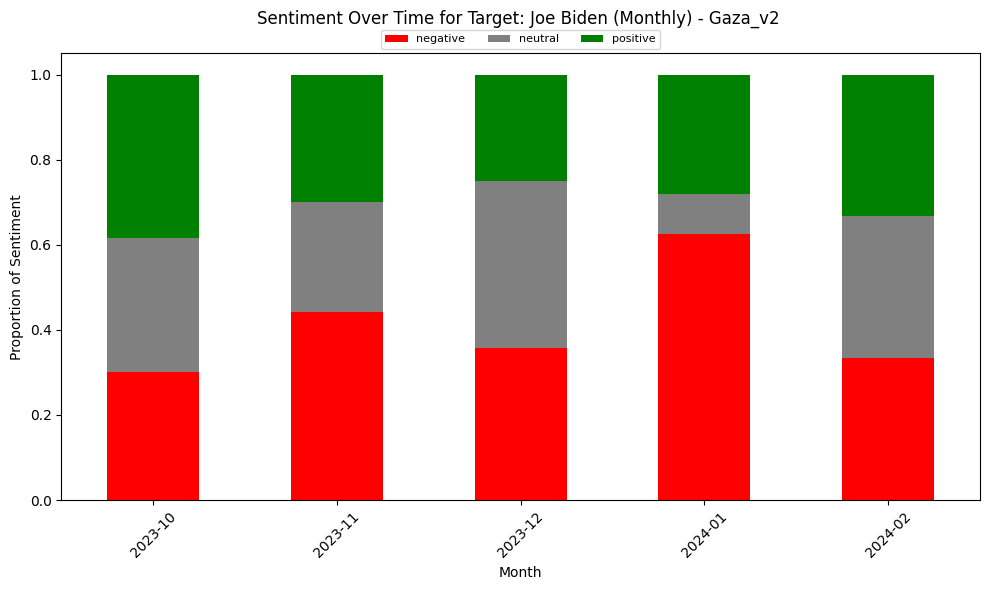

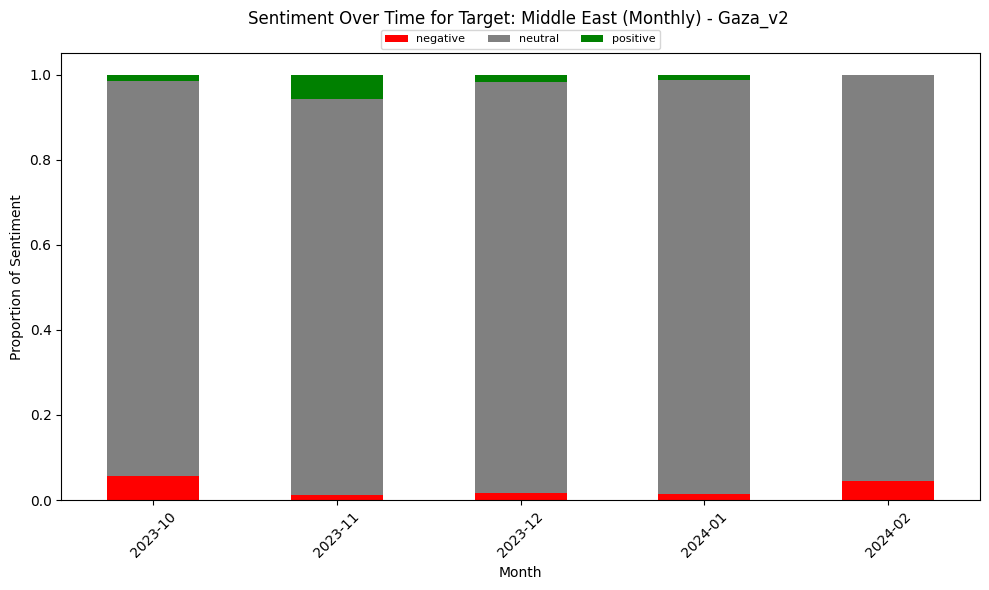

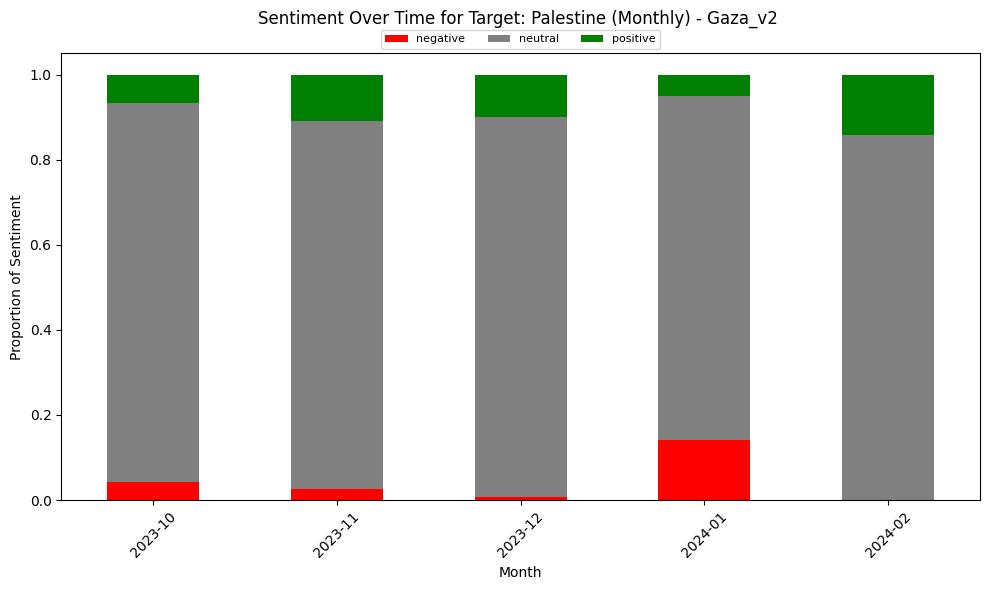

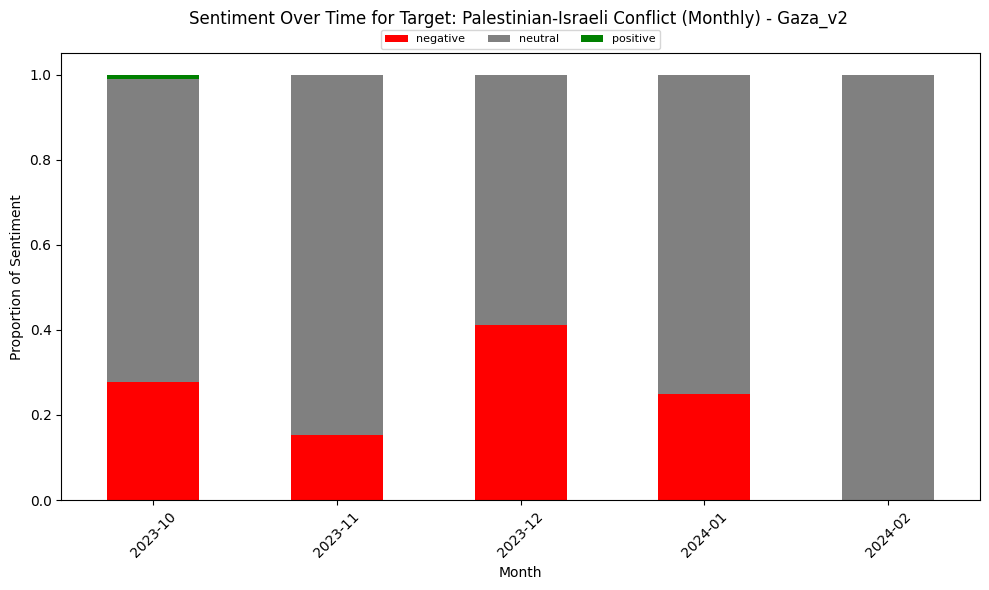

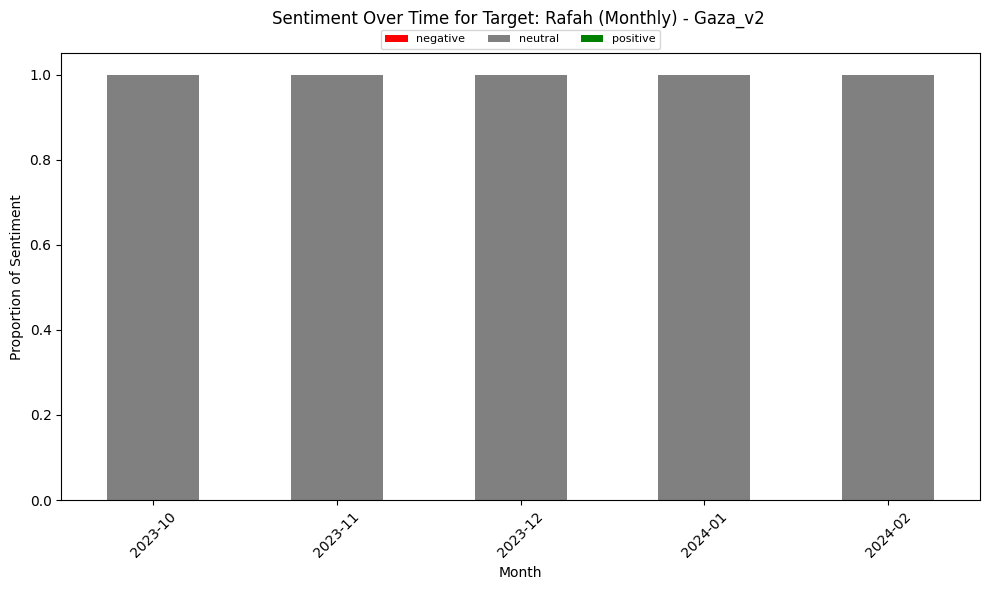

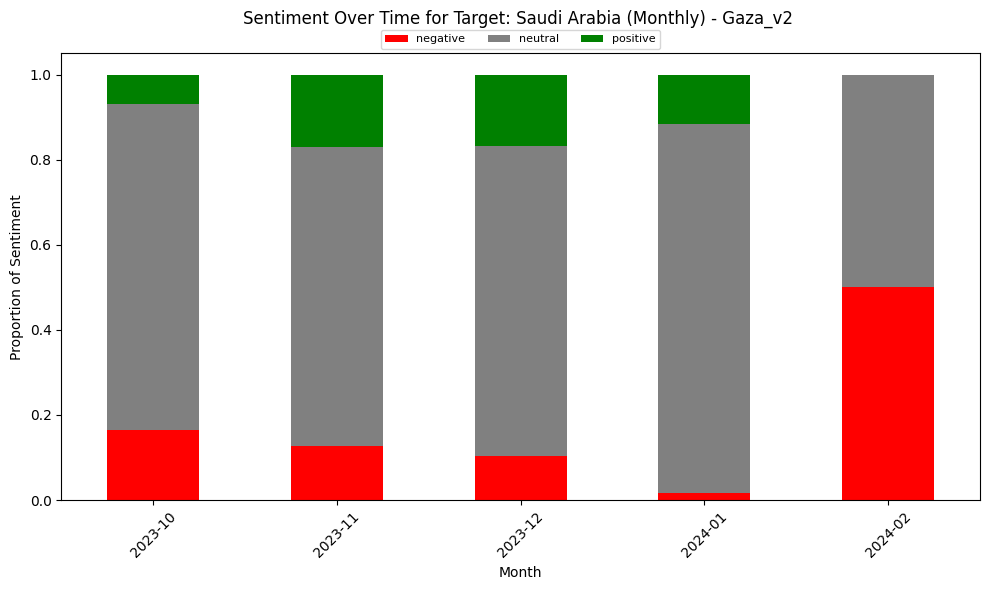

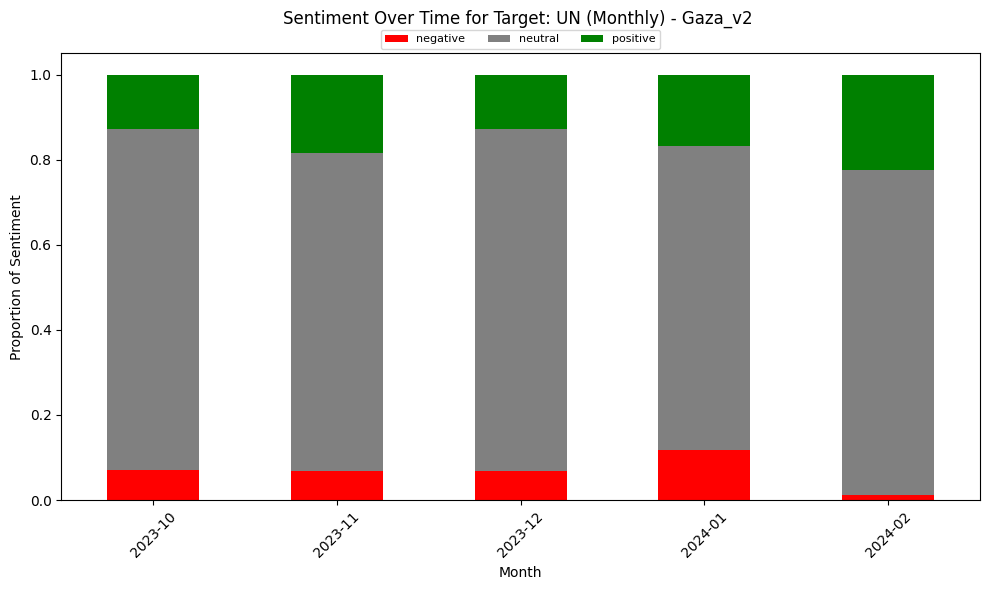

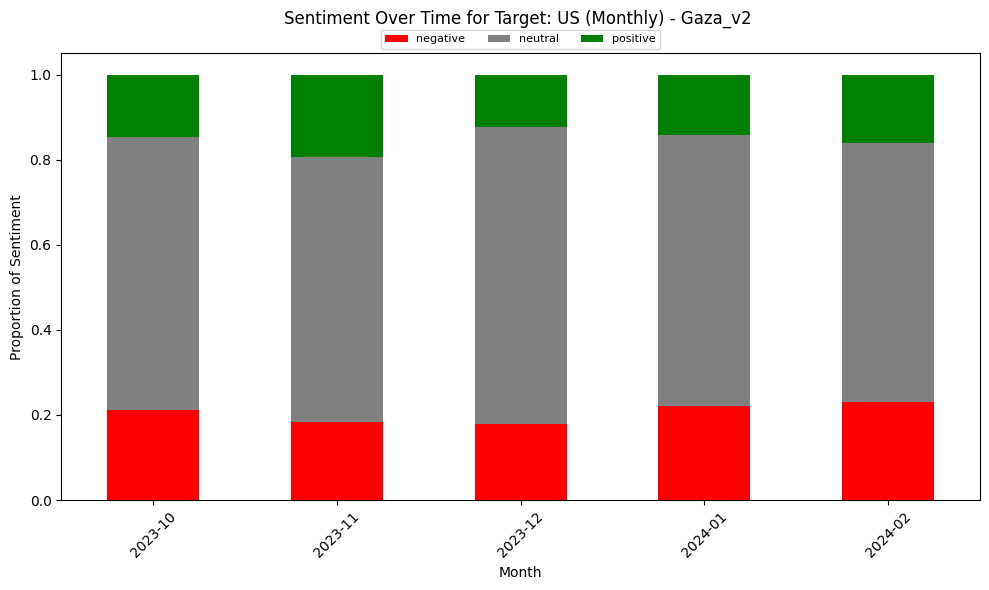

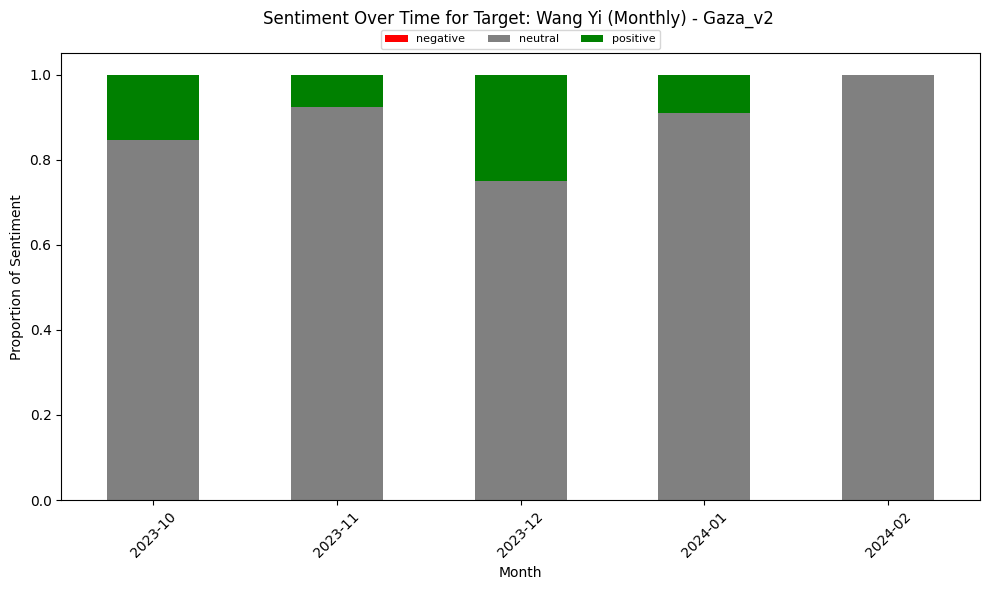

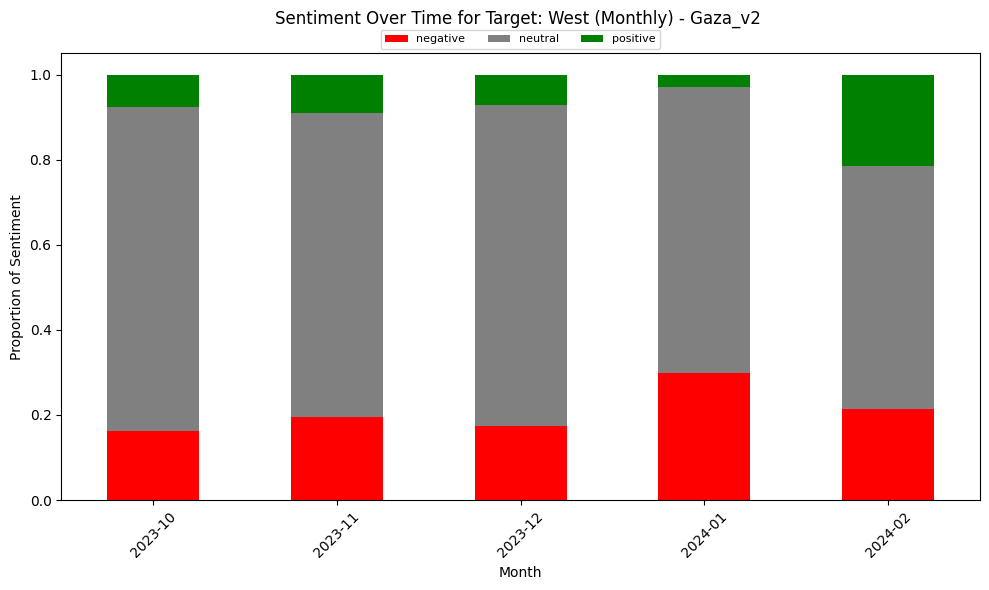

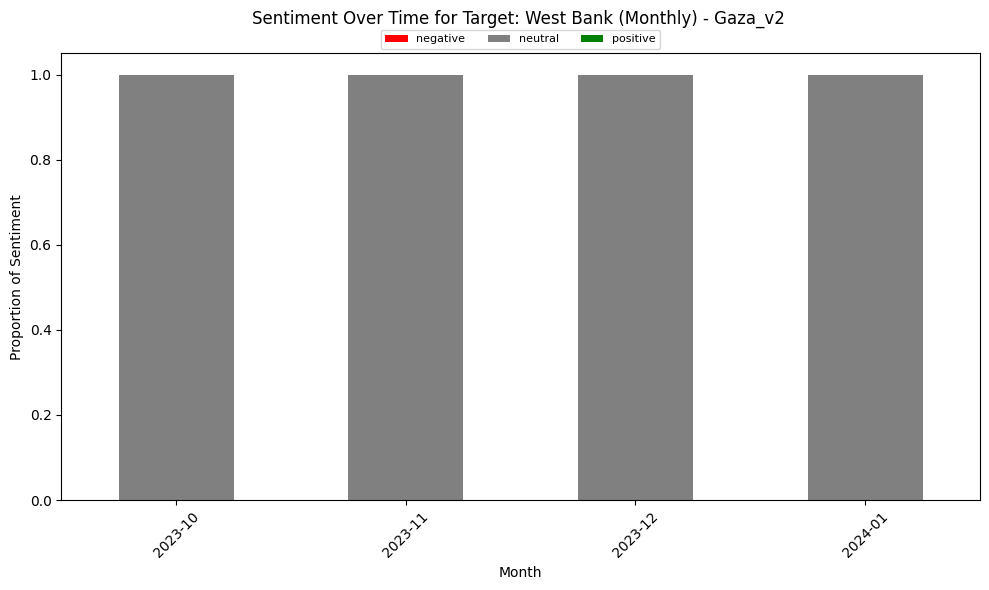

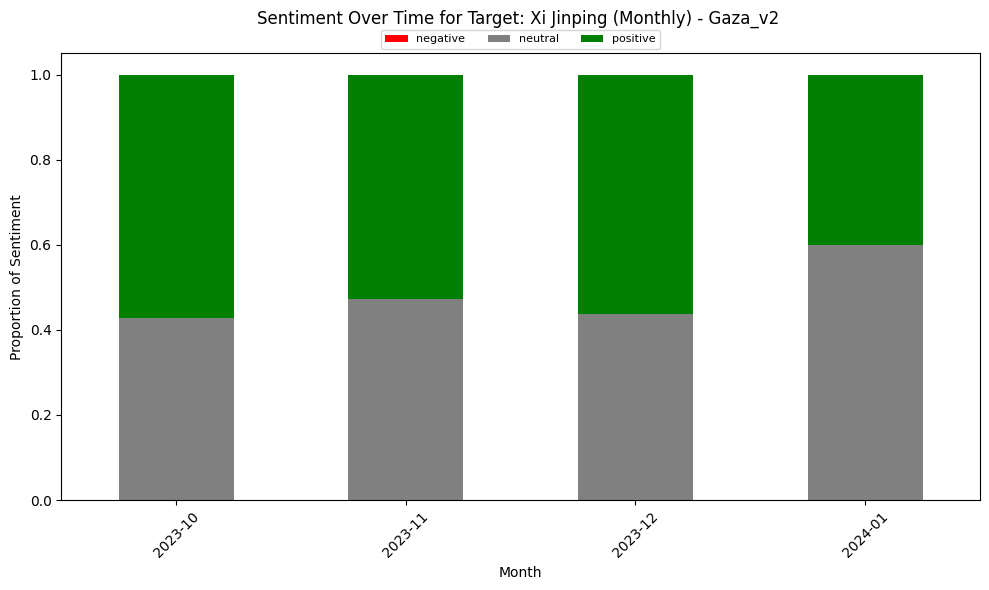

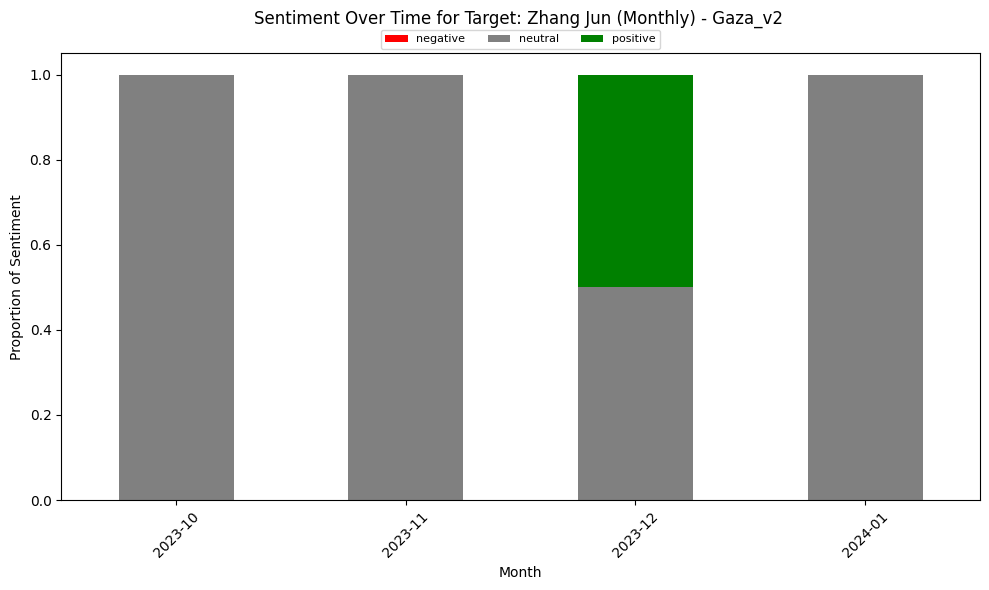

In [ ]:
#sentiment over time by target - monthly
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#group by month and target, count sentiment occurrences
sentiment_over_time = tsc_results_df.groupby(['month', 'Target', 'Sentiment']).size().unstack(fill_value=0)

#normalize to get sentiment proportions over time
sentiment_over_time_proportion = sentiment_over_time.div(sentiment_over_time.sum(axis=1), axis=0)

#plot sentiment over time for each target (monthly) using stacked bar chart
for target in sentiment_over_time_proportion.index.get_level_values('Target').unique():
    target_data = sentiment_over_time_proportion.xs(target, level='Target')

    months = target_data.index.astype(str)
    target_data.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], figsize=(10, 6))

    plt.title(f'Sentiment Over Time for Target: {target} (Monthly) - Gaza_v2 \n')
    plt.xlabel('Month')
    plt.ylabel('Proportion of Sentiment')
    plt.xticks(rotation=45)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.065), ncol=3, fontsize=8)
    plt.tight_layout()
    plt.show()

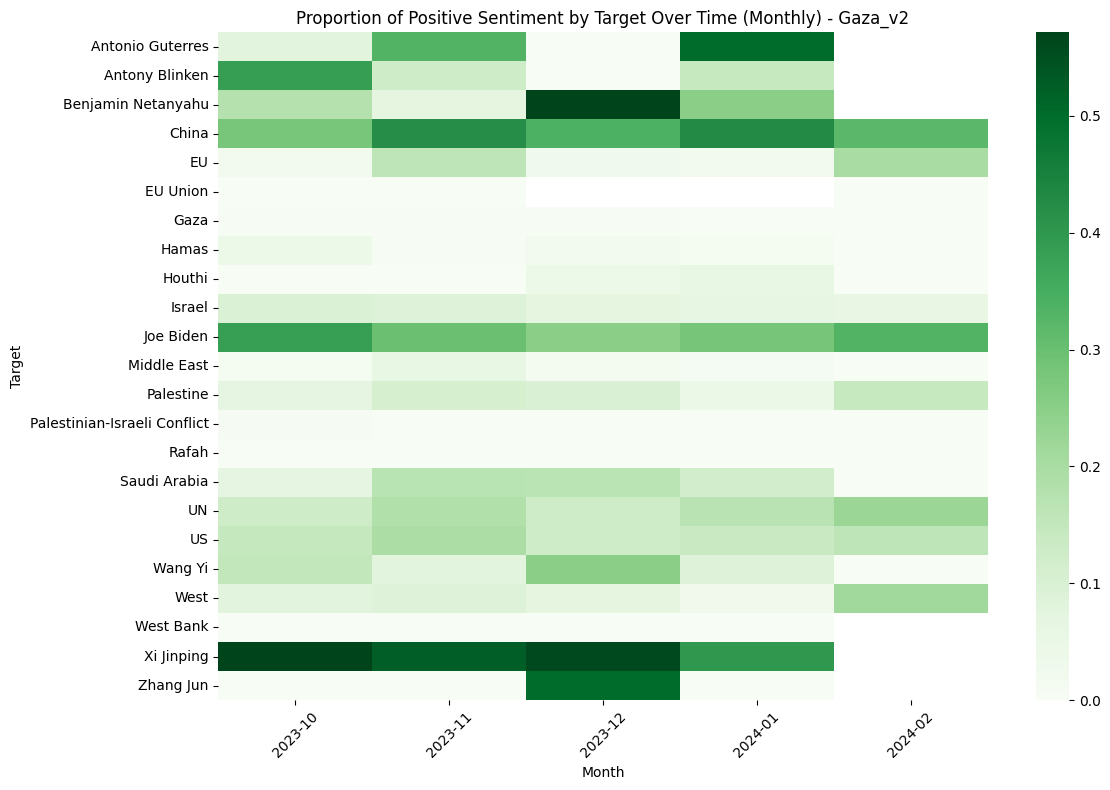

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'positive').mean())

#heatmap showing the proportion of positive sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Greens', annot=False, cbar=True)
plt.title('Proportion of Positive Sentiment by Target Over Time (Monthly) - Gaza_v2')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

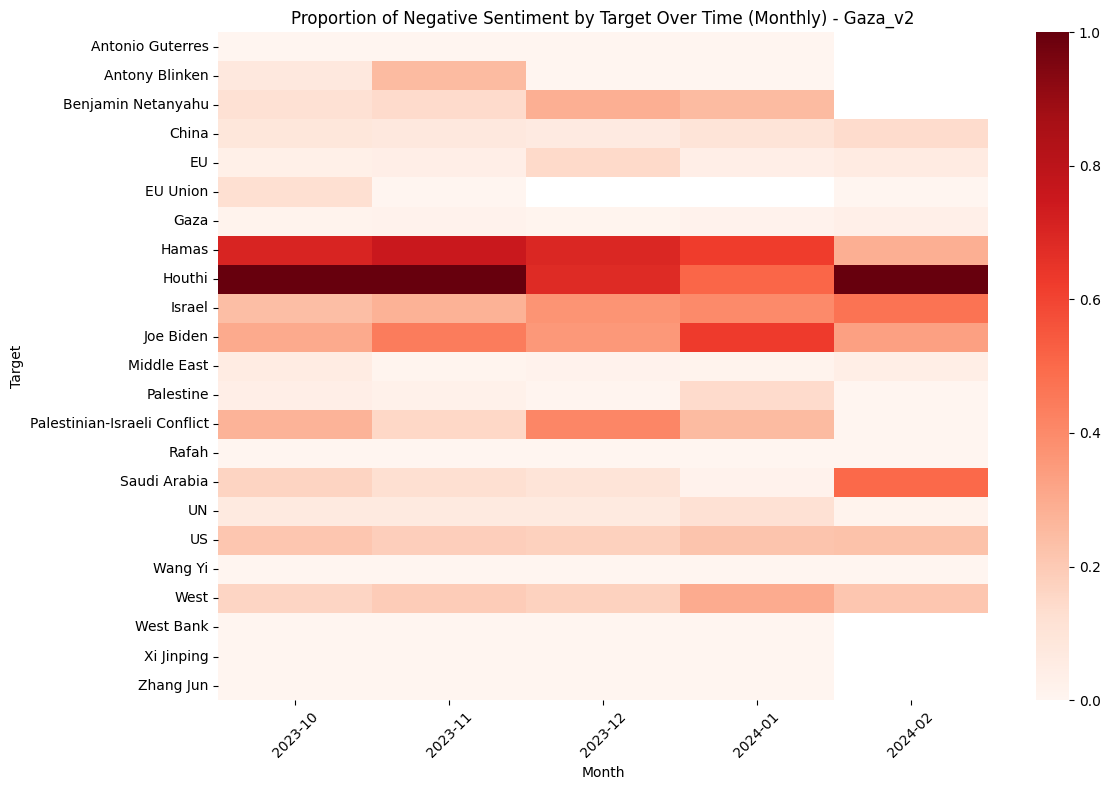

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'negative').mean())

#heatmap showing the proportion of negative sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=False, cbar=True)
plt.title('Proportion of Negative Sentiment by Target Over Time (Monthly) - Gaza_v2')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


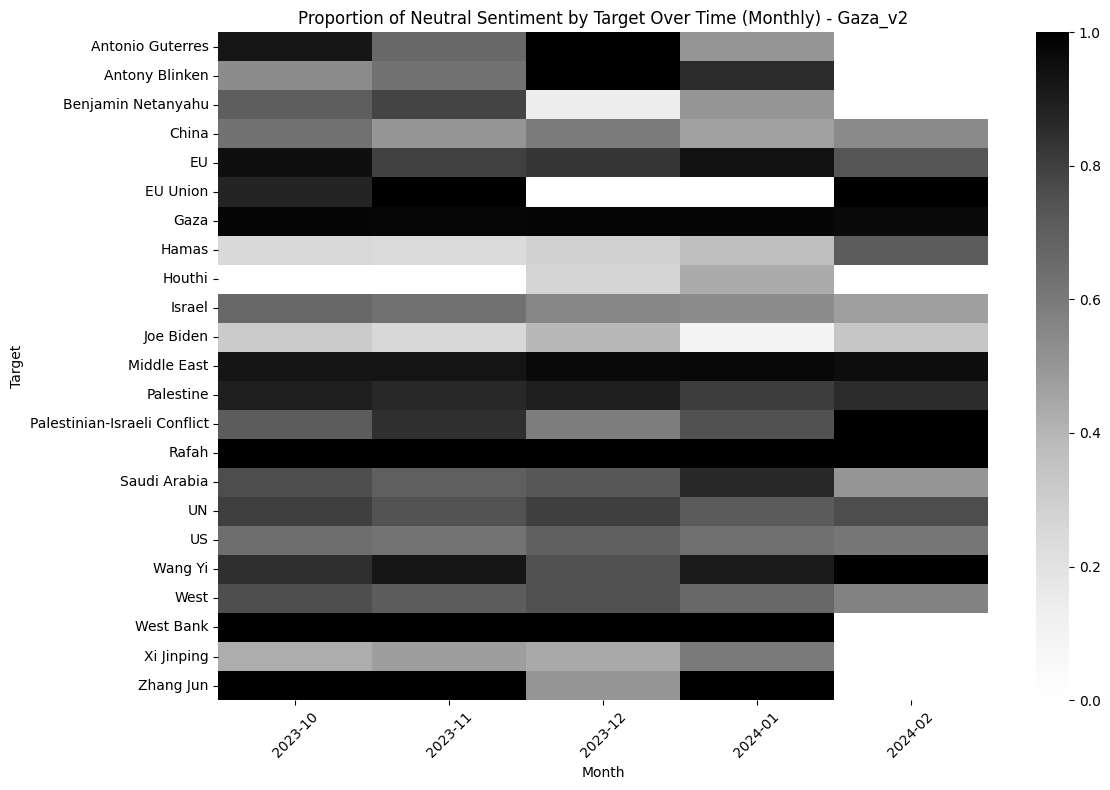

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'neutral').mean())

#heatmap showing the proportion of neutral sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Greys', annot=False, cbar=True)
plt.title('Proportion of Neutral Sentiment by Target Over Time (Monthly) - Gaza_v2')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()